# Playing with iterative maps

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Define the map

A = 0.93 # Angular Amplitude

f = lambda theta: A*np.sin(np.pi*theta)

theta_array = np.linspace(0, 1, 100, dtype = float)

f_array = [f(theta) for theta in theta_array]

<IPython.core.display.Javascript object>


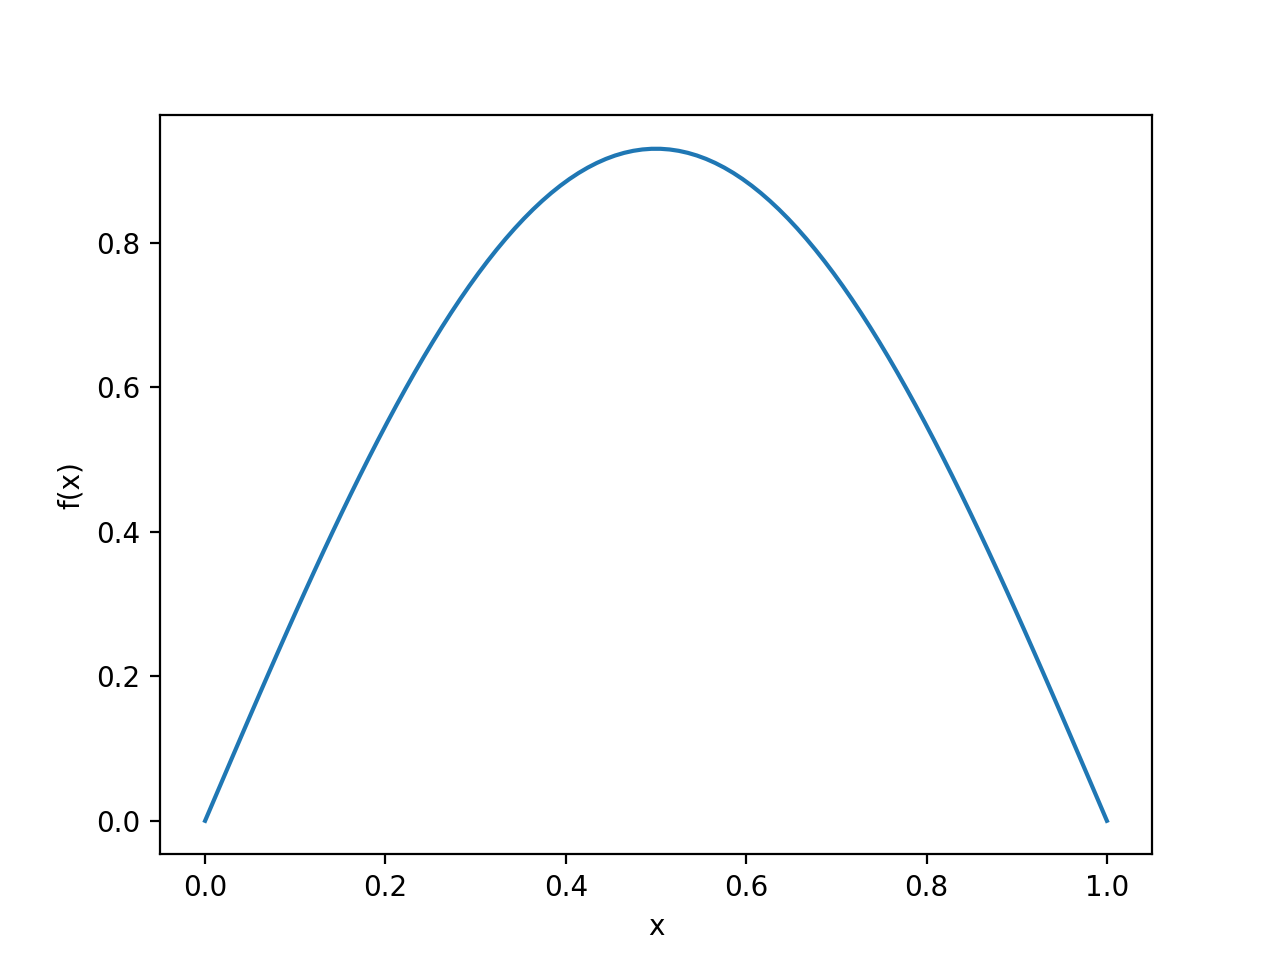

In [82]:
plt.figure()
plt.plot(theta_array, f_array)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## Iterate the map over N iterations

In [83]:
N_iter = 1000

theta_solution = np.zeros(N_iter, dtype = float)

theta_0 = np.pi/4

theta_n = theta_0
theta_n_1 = None

for ii in range(N_iter):
    
    theta_n_1 = f(theta_n)
    
    theta_n = theta_n_1
    
    theta_solution[ii] = theta_n
    
    
    

<IPython.core.display.Javascript object>


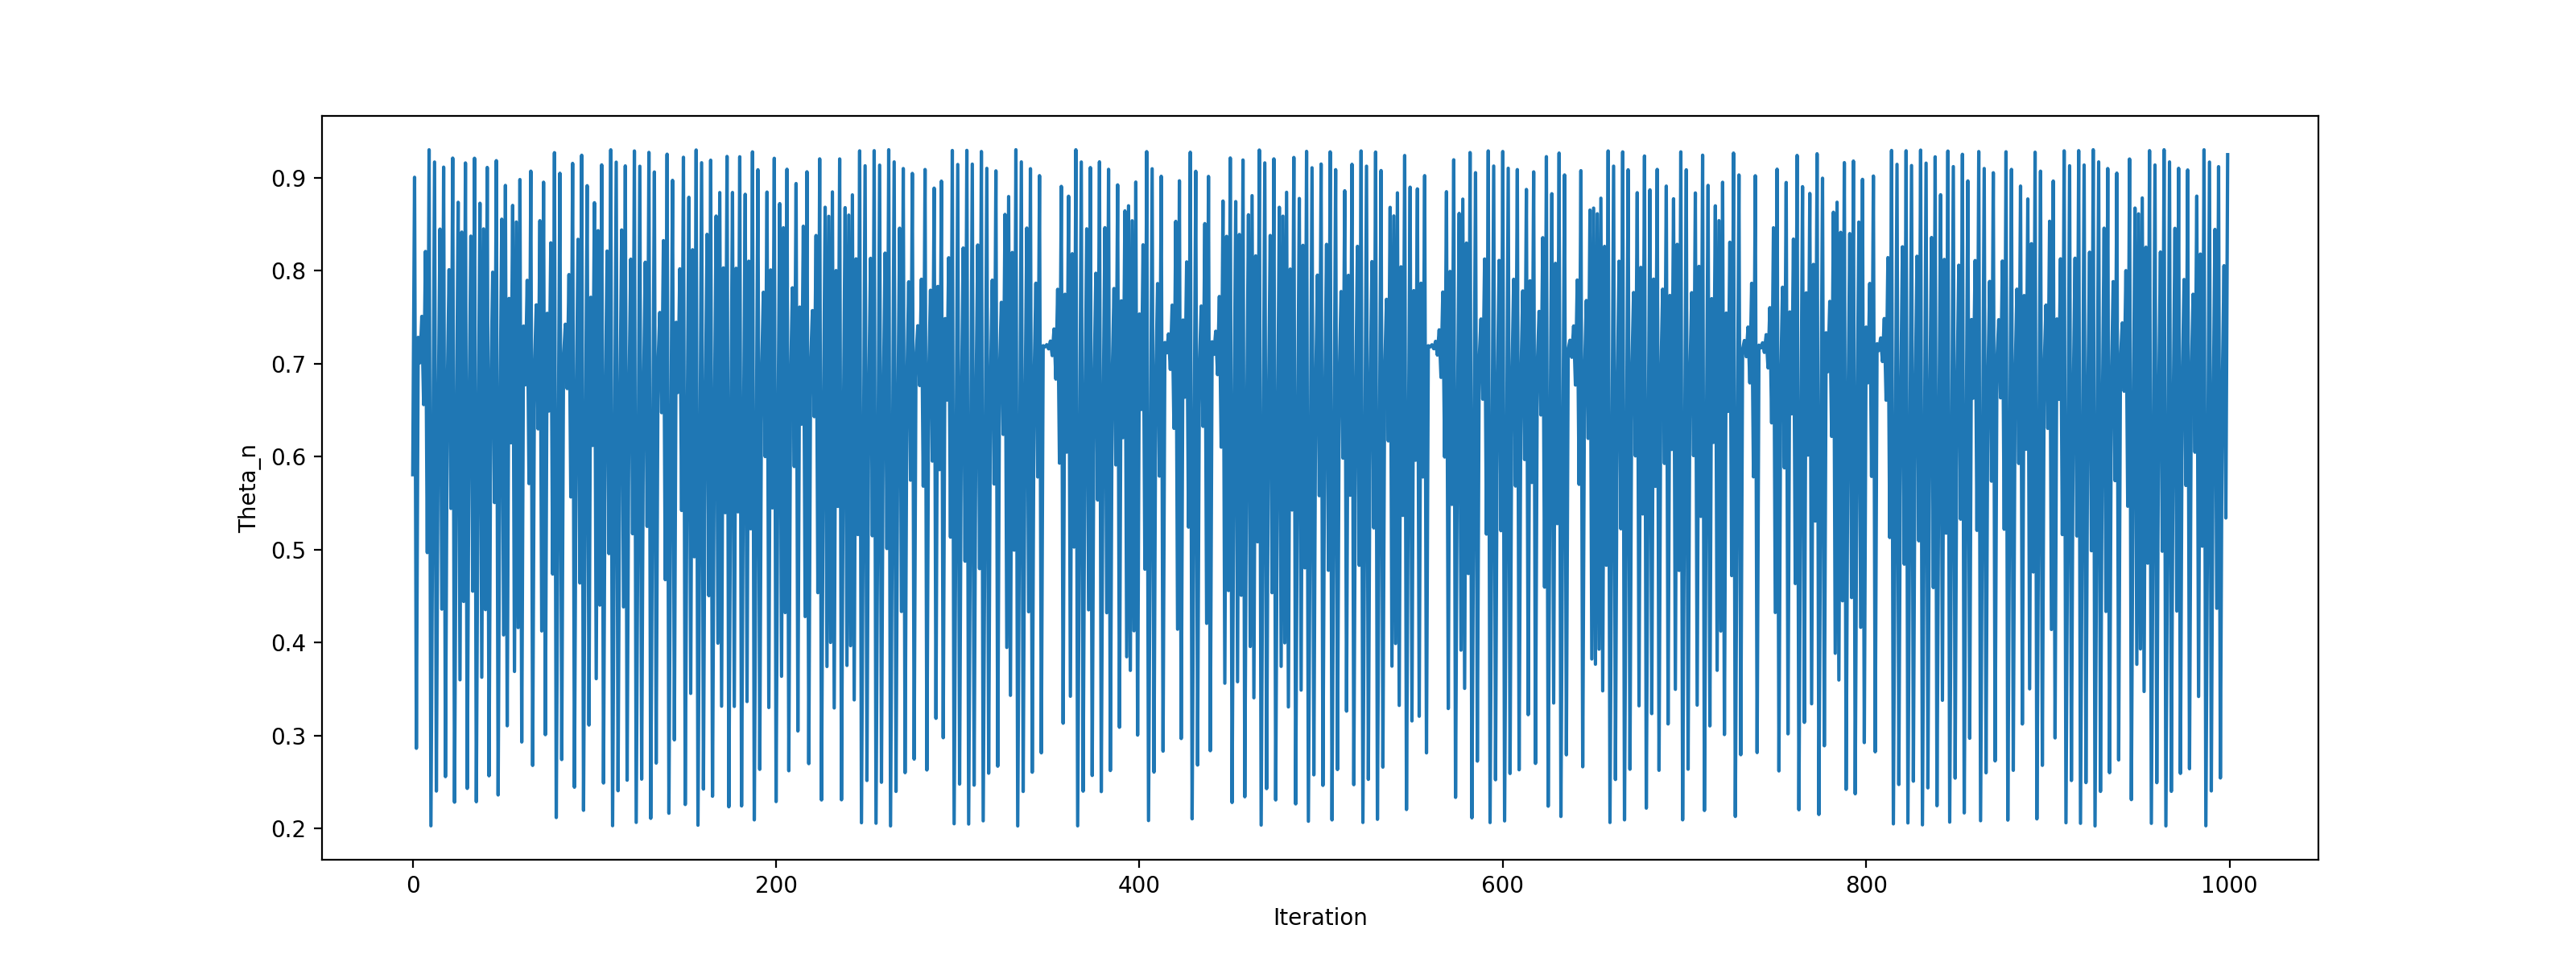

In [84]:
plt.figure(figsize=(8,3))
plt.plot(theta_solution)
plt.ylabel('Theta_n')
plt.xlabel('Iteration')
plt.show()

# Logistic map

In [4]:
a = 3.56994
logistic_map = lambda x: a*x*(1-x)

In [5]:
N_iter = 25000

x_logistic = np.zeros((N_iter))

x_n = 0.1 # Initial Condition (arbitrary in [0,1])

for ii in range(N_iter):
    
    x_n_1 = logistic_map(x_n)
    x_logistic[ii] = x_n_1
    x_n = x_n_1

<IPython.core.display.Javascript object>


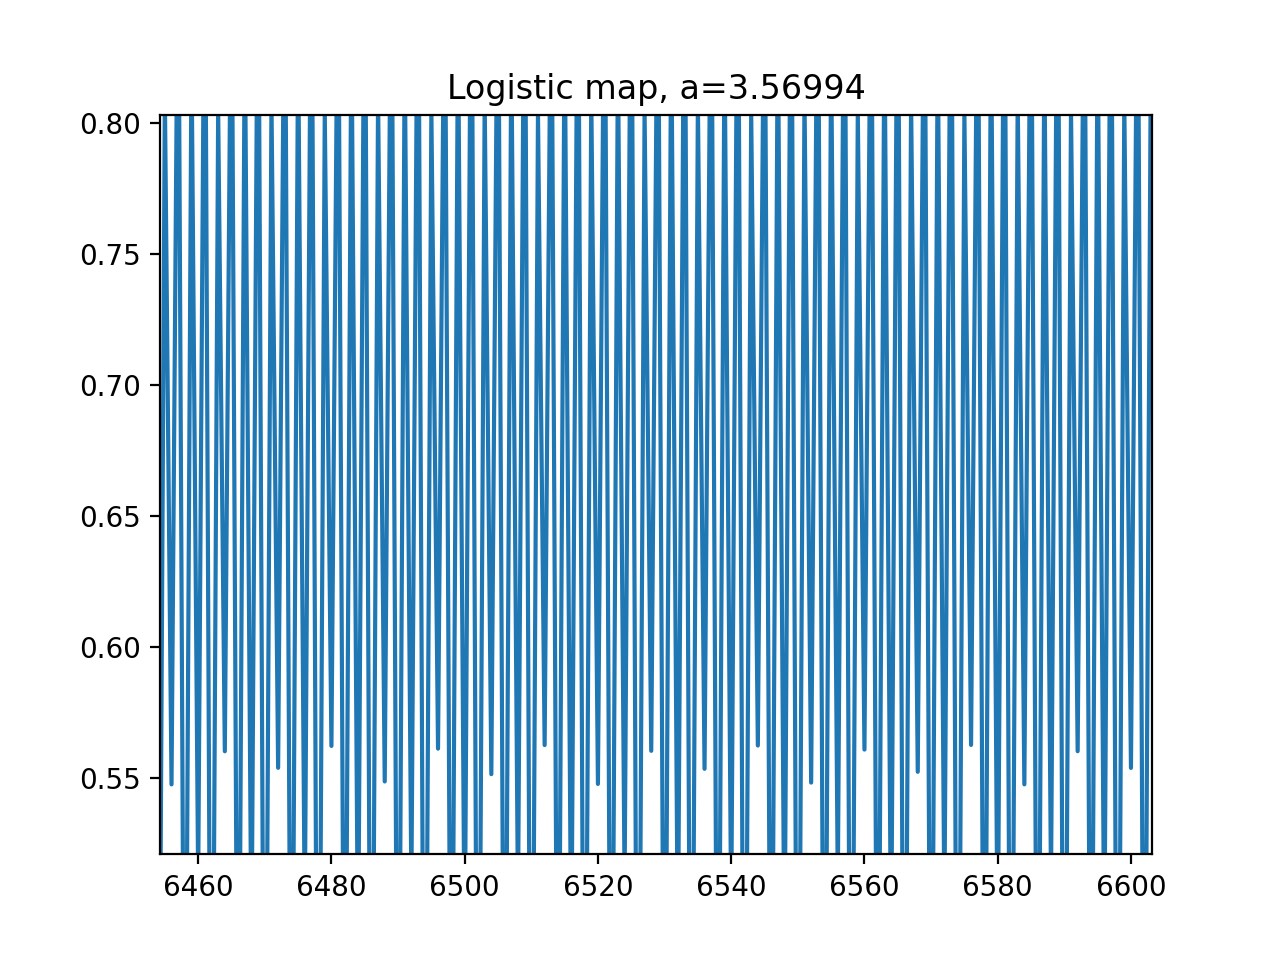

In [6]:
# Plot the trajectory vs time

plt.figure()

plt.plot(x_logistic)

plt.title('Logistic map, a={}'.format(a))
plt.show()

In [15]:
# Calculate the dimensions of the map
import skdim
import numpy as np


data = np.zeros((len(x_logistic[1000:]),2))

data[:,0] = x_logistic[1000:]

corr_dim = skdim.id.CorrInt().fit(data)
corr_dim.dimension_

nan

In [13]:
#estimate global intrinsic dimension
danco = skdim.id.DANCo().fit(data)
#estimate local intrinsic dimension (dimension in k-nearest-neighborhoods around each point):
lpca = skdim.id.lPCA(ver = 'FO').fit_pw(data,
                              n_neighbors = 100,
                              n_jobs = 1)
                            
#get estimated intrinsic dimension
print(danco.dimension_, np.mean(lpca.dimension_pw_)) 

nan 1.0
nan


In [12]:
# Local Correlation dimension
corr_dim = skdim.id.CorrInt().fit_pw(data, n_neighbors = 100, n_jobs = 1)
print(np.mean(corr_dim.dimension_pw_))

array([[0.3212946 , 0.        ],
       [0.77847675, 0.        ],
       [0.61563865, 0.        ],
       ...,
       [0.89097217, 0.        ],
       [0.34678668, 0.        ],
       [0.80868308, 0.        ]])

# Henon map

In [41]:
a=1.4
b=0.3

def henon_map(x_n, y_n):
    
    x_n_1 = y_n + 1 - a*x_n**2
    y_n_1 = b*x_n
    
    return x_n_1, y_n_1


N_iter = 15000

x_0, y_0 = 1,1 

output_array = np.zeros((N_iter, 2))

output_array[0,0], output_array[0,1] = henon_map(x_0, y_0)

for ii in range(N_iter-1):
    
    output_array[ii+1,0], output_array[ii+1,1] = henon_map(output_array[ii,0], output_array[ii,1])



<IPython.core.display.Javascript object>


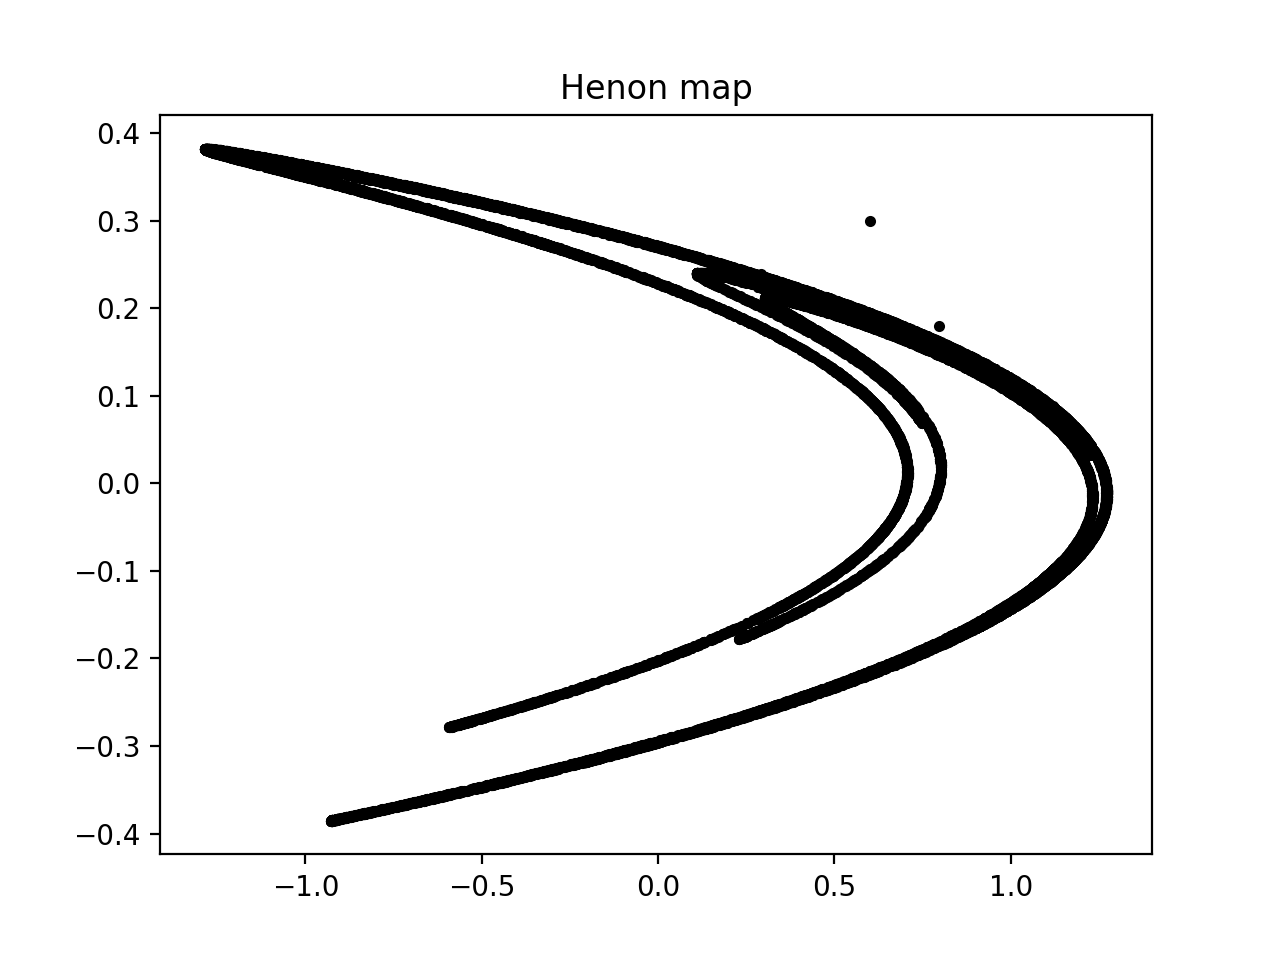

In [42]:
%matplotlib notebook

plt.figure()
plt.scatter(output_array[:,0], output_array[:,1], marker = '.', color = 'k')

plt.title('Henon map')

plt.show()

In [43]:
data = output_array

#estimate global intrinsic dimension
danco = skdim.id.DANCo().fit(data)
#estimate local intrinsic dimension (dimension in k-nearest-neighborhoods around each point):
lpca = skdim.id.lPCA(ver = 'FO').fit_pw(data,
                              n_neighbors = 100,
                              n_jobs = 1)
                            
#get estimated intrinsic dimension

print('DANCO dimension: ', danco.dimension_)

print('PCA dimension: ', np.mean(lpca.dimension_pw_)) 

# Global correlation dimension

corr_dim = skdim.id.CorrInt(k1=5, k2=20).fit(data)
print('Correlation dimension (global): ',corr_dim.dimension_)


corr_dim = skdim.id.CorrInt().fit_pw(data, n_neighbors = 100, n_jobs = 1)

print('Correlation dimension (point-wise): ', np.mean(corr_dim.dimension_pw_))

DANCO dimension:  1.0
PCA dimension:  1.6544
Correlation dimension (global):  1.1024905473629807
Correlation dimension (point-wise):  1.1190267750248983


# Kaplan-Yorke map

In [32]:
alpha = 0.2

def kaplan_yorke(x_n, y_n):
    
    x_n_1 = 2*x_n%0.99995
    y_n_1 = alpha*y_n + np.cos(4*np.pi*x_n)
    
    return x_n_1, y_n_1


N_iter = 15000

x_0, y_0 = 1,1 

output_array = np.zeros((N_iter, 2))

output_array[0,0], output_array[0,1] = kaplan_yorke(x_0, y_0)

for ii in range(N_iter-1):
    
    output_array[ii+1,0], output_array[ii+1,1] = kaplan_yorke(output_array[ii,0], output_array[ii,1])

<IPython.core.display.Javascript object>


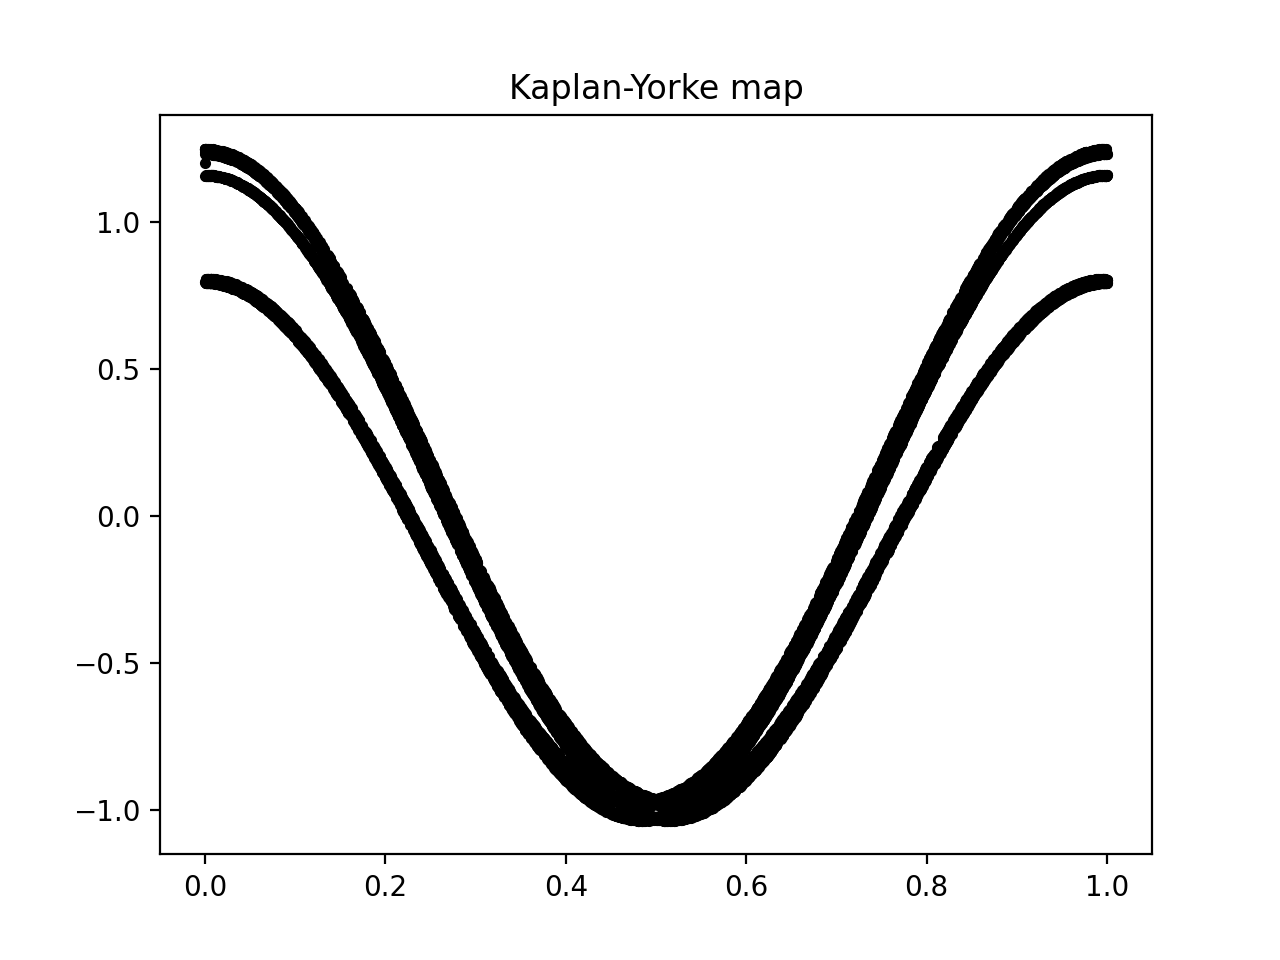

In [33]:
plt.figure()
plt.scatter(output_array[:,0], output_array[:,1], marker = '.', color = 'k')

plt.title('Kaplan-Yorke map')

plt.show()

In [40]:
data = output_array

#estimate global intrinsic dimension
danco = skdim.id.DANCo().fit(data)
#estimate local intrinsic dimension (dimension in k-nearest-neighborhoods around each point):
lpca = skdim.id.lPCA(ver = 'FO').fit_pw(data,
                              n_neighbors = 100,
                              n_jobs = 1)
                         
#get estimated intrinsic dimension
print('DANCO dimension: ', danco.dimension_)
print('PCA dimension: ', np.mean(lpca.dimension_pw_)) 

# Global correlation dimension
corr_dim = skdim.id.CorrInt(k1=5, k2=20).fit(data)
print('Correlation dimension (global): ',corr_dim.dimension_)

# Local correlation dimension
corr_dim = skdim.id.CorrInt().fit_pw(data, n_neighbors = 100, n_jobs = 1)
print('Correlation dimension (point-wise): ', np.mean(corr_dim.dimension_pw_))

DANCO dimension:  2.000005562629413
PCA dimension:  1.7879333333333334
Correlation dimension (global):  1.4140368048775578
Correlation dimension (point-wise):  1.4551740369110726


In [46]:
Gamma = 3.0
mu = (1 - np.exp(-Gamma))/Gamma
nu = 400.0/3
epsilon = 0.3

def zaslavskii_map(x_n, y_n):
    
    x_n_1 = (x_n + nu*(1+mu*y_n) + epsilon*nu*mu*np.cos(2*np.pi*x_n))%(0.99995)
    y_n_1 = np.exp(-Gamma)*(y_n + epsilon*np.cos(2*np.pi*x_n))
    
    return x_n_1, y_n_1

N_iter = 25000

x_0, y_0 = 0,0 

output_array = np.zeros((N_iter, 2))

output_array[0,0], output_array[0,1] = zaslavskii_map(x_0, y_0)

for ii in range(N_iter-1):
    
    output_array[ii+1,0], output_array[ii+1,1] = zaslavskii_map(output_array[ii,0], output_array[ii,1])

<IPython.core.display.Javascript object>


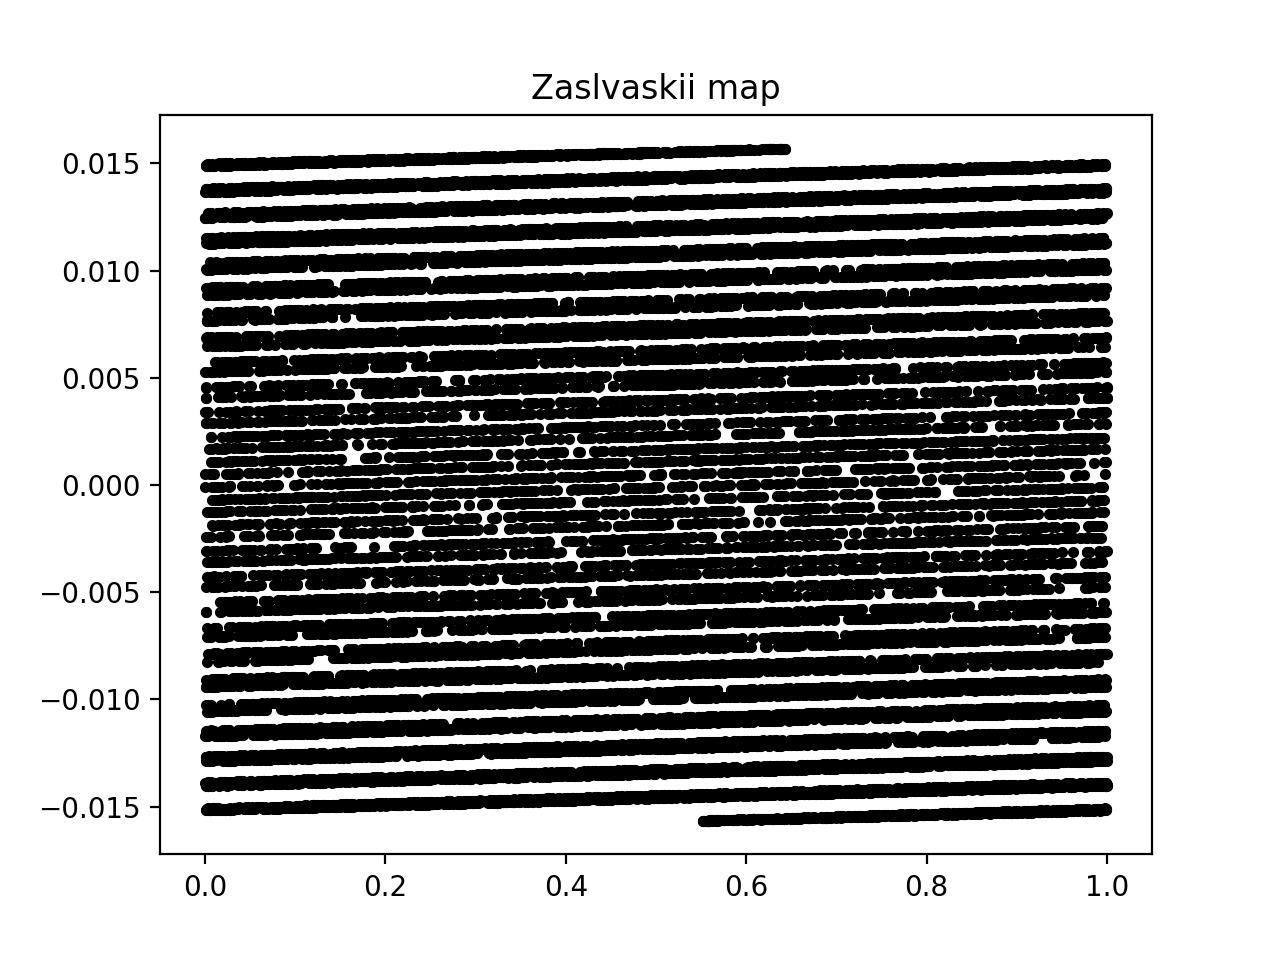

In [47]:
plt.figure()
plt.scatter(output_array[:,0], output_array[:,1], marker = '.', color = 'k')

plt.title('Zaslvaskii map')

plt.show()

In [48]:
data = output_array

#estimate global intrinsic dimension
danco = skdim.id.DANCo().fit(data)
#estimate local intrinsic dimension (dimension in k-nearest-neighborhoods around each point):
lpca = skdim.id.lPCA(ver = 'FO').fit_pw(data,
                              n_neighbors = 100,
                              n_jobs = 1)
                         
#get estimated intrinsic dimension
print('DANCO dimension: ', danco.dimension_)
print('PCA dimension: ', np.mean(lpca.dimension_pw_)) 

# Global correlation dimension
corr_dim = skdim.id.CorrInt(k1=5, k2=20).fit(data)
print('Correlation dimension (global): ',corr_dim.dimension_)

# Local correlation dimension
corr_dim = skdim.id.CorrInt().fit_pw(data, n_neighbors = 100, n_jobs = 1)
print('Correlation dimension (point-wise): ', np.mean(corr_dim.dimension_pw_))

DANCO dimension:  2.000005562629413
PCA dimension:  2.0
Correlation dimension (global):  1.8727713041163745
Correlation dimension (point-wise):  1.7161252770976836
